In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris=pd.read_csv("Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.drop("Id",axis=1,inplace=True)

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


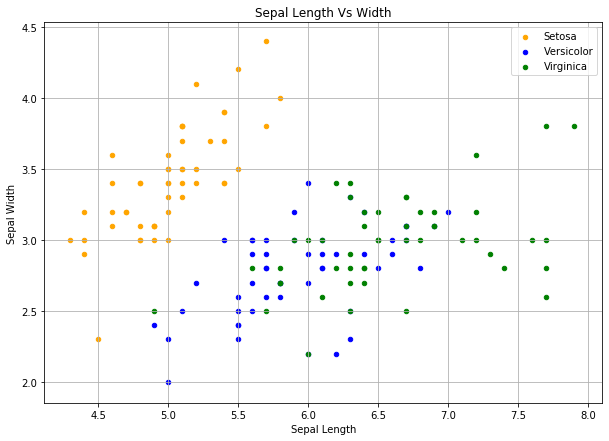

In [13]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.grid()
plt.show()

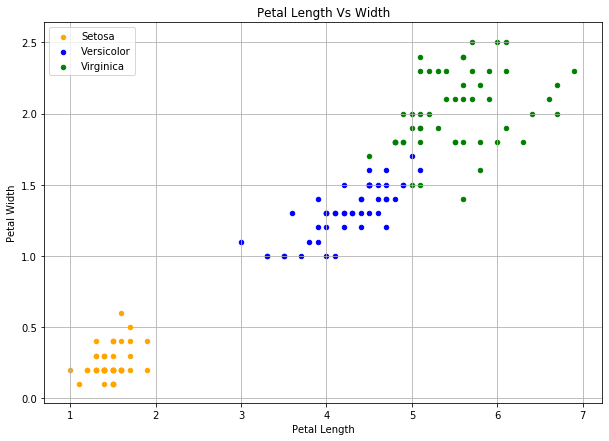

In [14]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.grid()
plt.show()

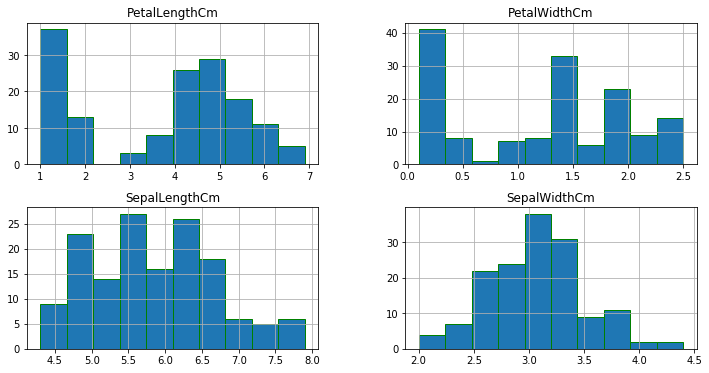

In [19]:
iris.hist(edgecolor='green')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

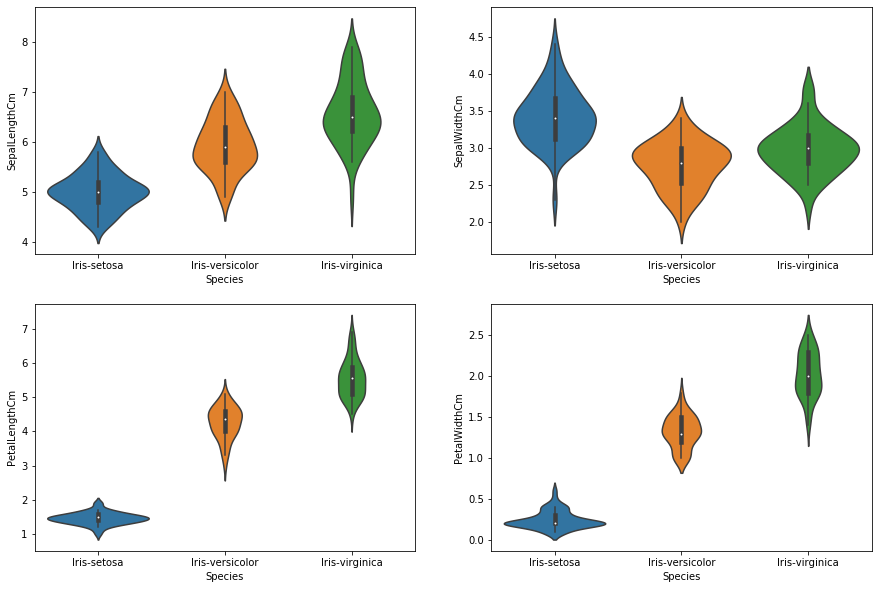

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

In [26]:
iris.shape

(150, 5)

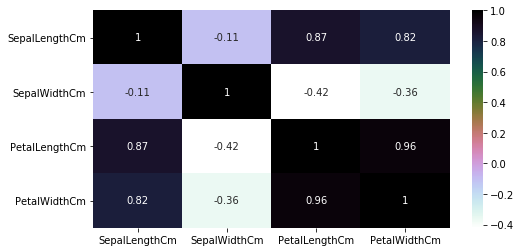

In [27]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

iris_train,iris_test=train_test_split(iris,test_size=0.3)
print(iris_train.shape)
print(iris_test.shape)

(105, 5)
(45, 5)


In [41]:
X_train = iris_train.iloc[:,:-1]
y_train = iris_train.iloc[:,-1]

X_test = iris_test.iloc[:,:-1]
y_test = iris_test.iloc[:,-1]


In [43]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
29,4.7,3.2,1.6,0.2
9,4.9,3.1,1.5,0.1
23,5.1,3.3,1.7,0.5
106,4.9,2.5,4.5,1.7


In [44]:
y_train.head()

14        Iris-setosa
29        Iris-setosa
9         Iris-setosa
23        Iris-setosa
106    Iris-virginica
Name: Species, dtype: object

In [45]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
27,5.2,3.5,1.5,0.2
117,7.7,3.8,6.7,2.2
33,5.5,4.2,1.4,0.2
100,6.3,3.3,6.0,2.5


In [46]:
y_test.head()

61     Iris-versicolor
27         Iris-setosa
117     Iris-virginica
33         Iris-setosa
100     Iris-virginica
Name: Species, dtype: object

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
l_reg= LogisticRegression()
l_reg.fit(X_train,y_train)
predict = l_reg.predict(X_test)
#print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(predict, y_test))
l_reg.score(X_test,y_test)

1.0

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
predict = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.9555555555555556

In [53]:
from sklearn.tree import DecisionTreeClassifier
classy = DecisionTreeClassifier()
classy.fit(X_train,y_train)
prediction= classy.predict(X_test)
classy.score(X_test,y_test)

0.9555555555555556

In [55]:
from sklearn import svm 
model = svm.SVC() 
model.fit(X_train,y_train)
pre = model.predict(X_test)
model.score(X_test,y_test)

0.9777777777777777